In [1]:
# 统计工作人员工作情况指标
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 读取根目录下的所有任务分配结果
path = '../dataset/crew'

# 遍历上述path
import os
files = os.listdir(path)
# 读取所有文件
df = pd.DataFrame()
for file in files:
    print(file)
    if not os.path.isdir(file):
        df = pd.concat([df, pd.read_csv(path + '/' + file)], axis=0)
# 重置索引
df = df.reset_index(drop=True)

crew_2-8.csv
crew_2-22.csv
crew_2-29.csv
crew_2-25.csv
crew_2-3.csv
crew_2-24.csv
crew_2-13.csv
crew_2-7.csv
crew_2-10.csv
crew_2-23.csv
crew_2-11.csv
crew_2-12.csv
crew_2-16.csv
crew_2-21.csv
crew_2-26.csv
crew_2-6.csv
crew_2-9.csv
crew_2-4.csv
crew_2-27.csv
crew_2-20.csv
crew_2-19.csv
crew_2-1.csv
crew_2-14.csv
crew_2-18.csv
crew_2-2.csv
crew_2-15.csv
crew_2-17.csv
crew_2-5.csv
crew_2-28.csv


In [4]:
df['count'].sum()

9365

In [6]:
# date 从 2-8 转换成为日期格式
df['month'] = df['date'].apply(lambda x: x.split('-')[0])
df['day'] = df['date'].apply(lambda x: x.split('-')[1])


Text(0.5, 1.0, 'Number of group people each day')

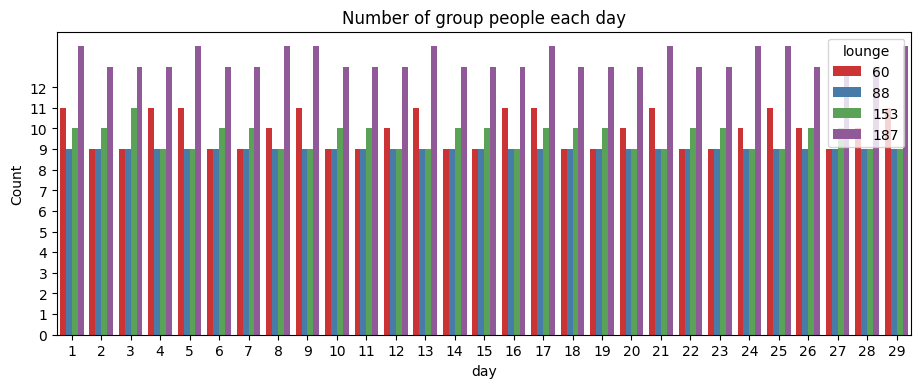

In [14]:
# 每天的工作量，统计每天的工作数量
mm = 1/25.4
plt.figure(figsize=(280*mm, 100*mm))
df['day'] = df['day'].astype(int)
df.sort_values(by='day', inplace=True)
sns.countplot(x='day', data=df,hue='lounge', palette='Set1')
plt.ylabel('Count')
plt.yticks(np.arange(0, 13,1))
plt.title('Number of group people each day')

Text(0.5, 1.0, 'Number of task each day')

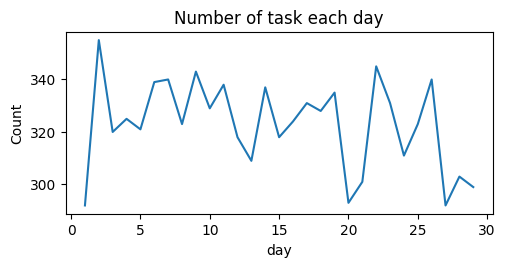

In [41]:
# 每天的任务数量
plt.figure(figsize=(140*mm, 60*mm))
df['day'] = df['day'].astype(int)
df.groupby('day')['count'].sum().plot()
plt.ylabel('Count')
plt.title('Number of task each day')


Text(0.5, 1.0, 'Number of group in February')

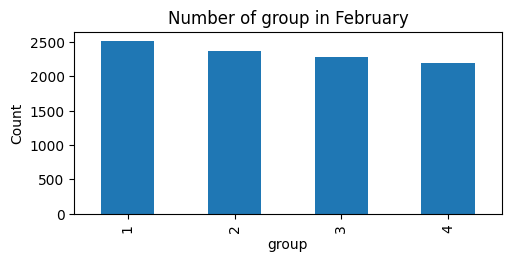

In [24]:
# 不同组别的工作量总和
plt.figure(figsize=(140*mm, 60*mm))
df.groupby('group')['count'].sum().plot(kind='bar')
plt.ylabel('Count')
plt.title('Number of group in February')

Text(0.5, 1.0, 'Single day work count of different group')

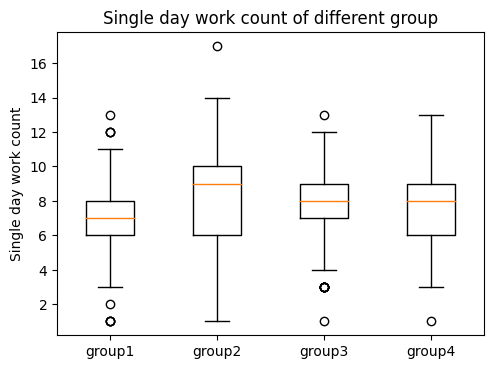

In [25]:
# 不同组别日工作量的分布
plt.figure(figsize=(140*mm, 100*mm))
plt.boxplot([df[df['group'] == i]['count'] for i in range(1, 5)])
plt.xticks(range(1, 5), ['group' + str(i) for i in range(1, 5)])
plt.ylabel('Single day work count')
plt.title('Single day work count of different group')

Text(0.5, 1.0, 'Single day work count of different day')

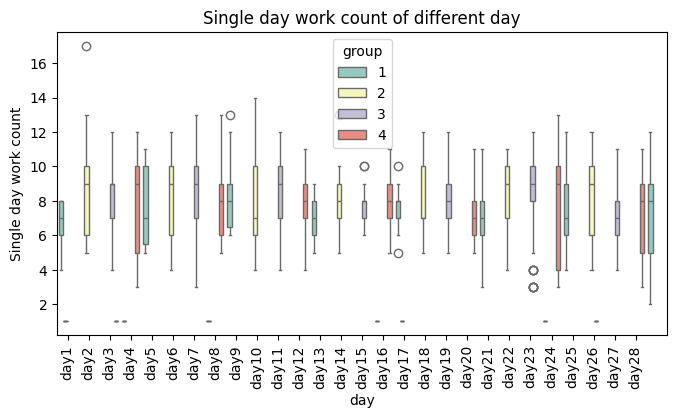

In [36]:
# 不同天的工作量均衡情况
plt.figure(figsize=(200*mm, 100*mm))
# plt.boxplot([df[df['day'] == i]['count'] for i in range(1, 29)])
sns.boxplot(x='day', y='count', data=df,hue='group', palette='Set3')
plt.xticks(range(0, 28), ['day' + str(i) for i in range(1, 29)], rotation=90)
plt.ylabel('Single day work count')
plt.title('Single day work count of different day')

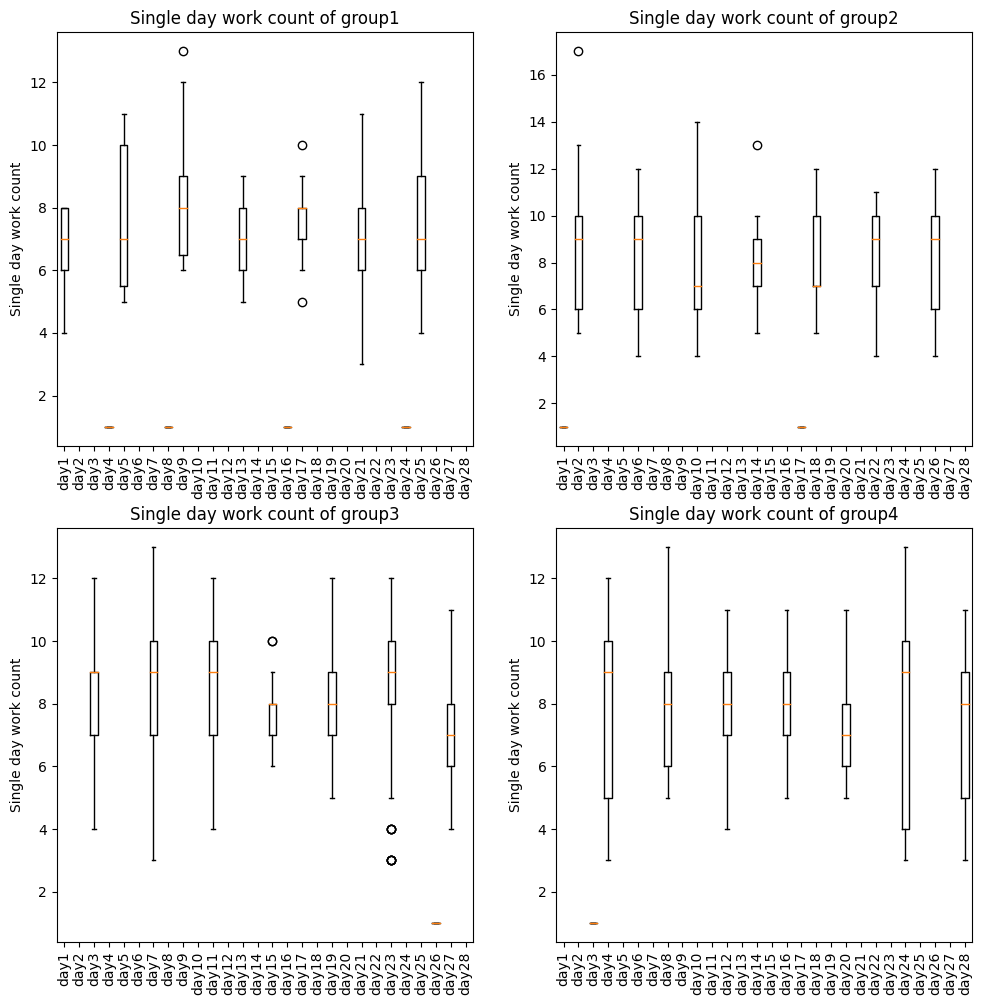

In [31]:
# 绘制四个组，不同天下的工作量分布
plt.figure(figsize=(300*mm, 300*mm))
for i in range(1, 5):
    plt.subplot(2, 2, i)
    plt.boxplot([df[(df['day'] == j) & (df['group'] == i)]['count'] for j in range(1, 29)])
    plt.xticks(range(1, 29), ['day' + str(j) for j in range(1, 29)], rotation=90)
    plt.ylabel('Single day work count')
    plt.title('Single day work count of group' + str(i))



In [19]:
df.columns

Index(['Unnamed: 0', 'name', 'isFangXing', 'isWeiXiu', 'isYiBan', 'lounge',
       'group', 'isZhongWen', 'isYingWen', 'status', 'work_load', 'end_time',
       'gate', 'count', 'free', 'date', 'month', 'day'],
      dtype='object')

Text(0.5, 1.0, 'Single day 27')

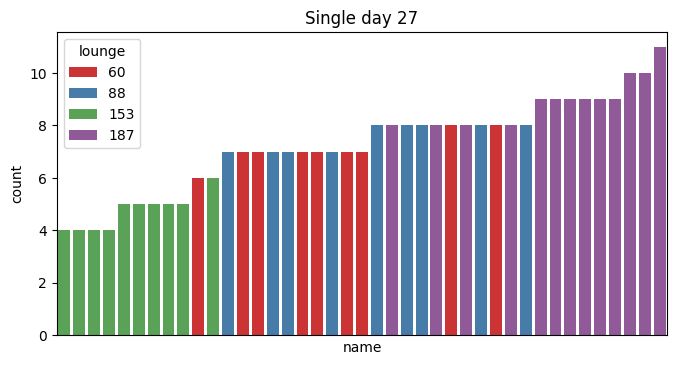

In [34]:
# 去 day == 1 进行可视化
i = 27
plt.figure(figsize=(200*mm, 100*mm))
sns.barplot(x='name', y='count', data=df[df['day'] == i].sort_values('count'),hue='lounge', palette='Set1')
plt.xticks([],rotation=90)
plt.title('Single day ' + str(i))

